## 002.两数相加
难度：中等

给你两个 非空 的链表，表示两个非负的整数。它们每位数字都是按照 逆序 的方式存储的，并且每个节点只能存储 一位 数字。

请你将两个数相加，并以相同形式返回一个表示和的链表。

你可以假设除了数字 0 之外，这两个数都不会以 0 开头。

输入：l1 = [2,4,3], l2 = [5,6,4]

输出：[7,0,8]

解释：342 + 465 = 807.

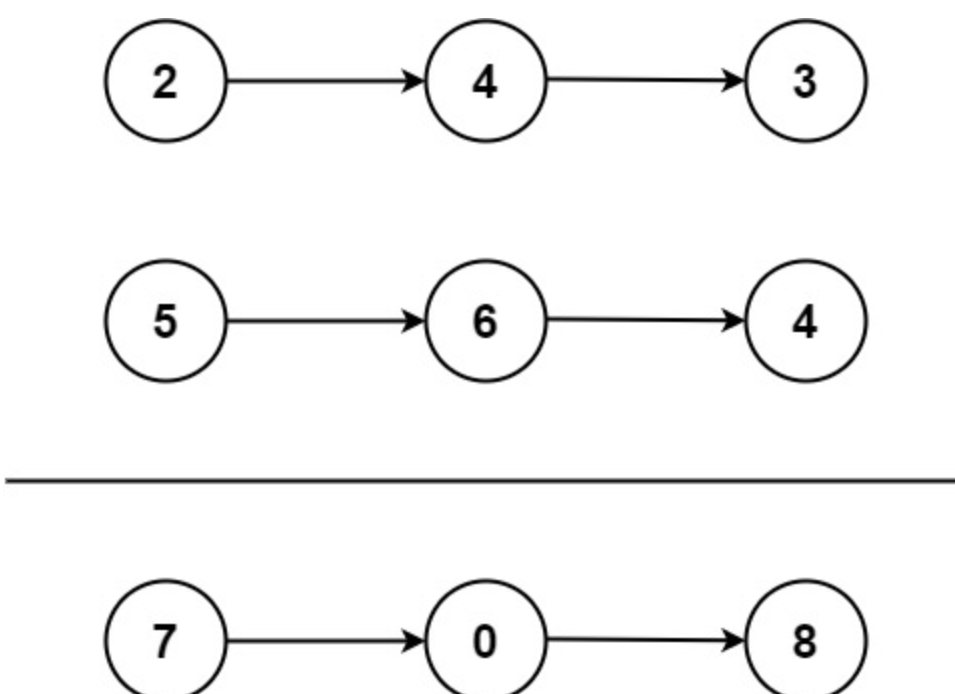

https://leetcode.cn/problems/add-two-numbers


In [2]:
# Definition for singly-linked list.
class ListNode(object):
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next

### 1.暴力法

O(N); O(N)

In [99]:
def addTwoNumbers(l1, l2):
    """
    :type l1: ListNode
    :type l2: ListNode
    :rtype: ListNode
    """
    l1_num = [l1.val]
    l2_num = [l2.val]
    while l1.next:
        l1_num.append(l1.next.val)
        l1 = l1.next
    while l2.next:
        l2_num.append(l2.next.val)
        l2 = l2.next
        
    
    num1 = int(''.join([str(s) for s in l1_num[::-1]]))
    num2 = int(''.join([str(s) for s in l2_num[::-1]]))
    
    result = str(num1 + num2)[::-1]
    
    root_node = ListNode(int(result[0]))
    node = root_node
    for i in range(1, len(result)):
        node.next =  ListNode(int(result[i]))
        node = node.next
    return root_node    

In [108]:
l1_2 = ListNode(3)
l1_1 = ListNode(4, l1_2)
l1 = ListNode(2, l1_1)

l2_2 = ListNode(4)
l2_1 = ListNode(6, l2_2)
l2 = ListNode(5, l2_1)

node = addTwoNumbers(l1, l2)
print(node.val)
while node.next:
    print(node.next.val)
    node = node.next

7
0
8


### 2.递归

O(N); O(1)

In [113]:
def addTwoNumbers(l1, l2):
    """
    :type l1: ListNode
    :type l2: ListNode
    :rtype: ListNode
    """
    if not l1 and not l2:
        return 
    elif not (l1 and l2):
        # l1和l2长度会不一样因为10进位
        return l1 or l2
    else:
        if l1.val + l2.val < 10:
            l3 = ListNode(l1.val + l2.val)
            l3.next = addTwoNumbers(l1.next, l2.next)
        else:
            l3 = ListNode(l1.val + l2.val - 10)
            l3.next = addTwoNumbers(l1.next, addTwoNumbers(l2.next, ListNode(1)))
    return l3

In [114]:
l1_2 = ListNode(3)
l1_1 = ListNode(4, l1_2)
l1 = ListNode(2, l1_1)

l2_2 = ListNode(4)
l2_1 = ListNode(6, l2_2)
l2 = ListNode(5, l2_1)

node = addTwoNumbers(l1, l2)
print(node.val)
while node.next:
    print(node.next.val)
    node = node.next

7
0
8
